<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.4: Sentiment Analysis

This lab performs sentiment analysis on sentiment-labelled sentences using two types of feature extraction - a count vectoriser and TF-IDF vectoriser.

Based on the video tutorial **Text Classification with Machine Learning,SpaCy and Scikit(Sentiment Analysis)** by **Jesse E. Agbe (JCharis)**.

## Data Source: UCI
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

### Dataset
- [Sentiment Labelled Sentences Data Set](http://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)

### Abstract
The dataset contains sentences labelled with positive or negative sentiment.

- Data Set Characteristics: Text
- Number of Instances: 3000
- Area: N/A
- Attribute Characteristics: N/A
- Number of Attributes: N/A
- Date Donated: 2015-05-30
- Associated Tasks: Classification
- Missing Values? N/A

### Source
Dimitrios Kotzias dkotzias '@' ics.uci.edu

### Data Set Information
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment.

### Format
sentence &lt;tab&gt; score &lt;newline&gt;

### Details
Score is either 1 (for positive) or 0 (for negative)

The sentences come from three different websites/fields:
- imdb.com
- amazon.com
- yelp.com

For each website, there exist **500 positive** and **500 negative** sentences. Those were selected randomly for larger datasets of reviews.

We attempted to select sentences that have a clearly positive or negative connotation, the goal was for no neutral sentences to be selected.

For the full datasets look:

- **imdb**: Maas et. al., 2011 _Learning word vectors for sentiment analysis_
- **amazon**: McAuley et. al., 2013 _Hidden factors and hidden topics: Understanding rating dimensions with review text_
- **yelp**: [Yelp dataset challenge](http://www.yelp.com/dataset_challenge)


### Attribute Information
The attributes are text sentences, extracted from reviews of products, movies, and restaurants

### Relevant Papers
**From Group to Individual Labels using Deep Features**, Kotzias et. al,. KDD 2015

### Citation Request
**From Group to Individual Labels using Deep Features**, Kotzias et. al,. KDD 2015

## Import libraries

In [1]:
## Import Libraries
import pandas as pd

import regex as re
import spacy

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

## Load data

Load Yelp, Amazon and Imdb Data into dataframes. Create three column names 'text', 'sentiment' and 'source' (equal to one of 'yelp', 'imdb' or 'amazon' for each dataframe).

Hint: Source is separated by tabs and has no headers.

In [2]:
yelp_text = 'yelp_labelled.txt'
imdb_text = 'imdb_labelled_fixed.txt'
amazon_text = 'amazon_cells_labelled.txt'

# ANSWER
yelp_df = pd.read_csv('yelp_labelled.txt', sep='\t', header=None, names=['text', 'sentiment'])
yelp_df['source'] = 'yelp'
# Load IMDB data
imdb_df = pd.read_csv('imdb_labelled_fixed.txt', sep='\t', header=None, names=['text', 'sentiment'])
imdb_df['source'] = 'imdb'
# Load Amazon data
amazon_df = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None, names=['text', 'sentiment'])
amazon_df['source'] = 'amazon'
# Combine all DataFrames
combined_df = pd.concat([yelp_df, imdb_df, amazon_df], ignore_index=True)

In [4]:
# Display the first few rows of the combined DataFrame
print(combined_df.head())

                                                text  sentiment source
0                           Wow... Loved this place.          1   yelp
1                                 Crust is not good.          0   yelp
2          Not tasty and the texture was just nasty.          0   yelp
3  Stopped by during the late May bank holiday of...          1   yelp
4  The selection on the menu was great and so wer...          1   yelp


In [5]:
print("\nData Types:")
print(combined_df.dtypes)


Data Types:
text         object
sentiment     int64
source       object
dtype: object


In [6]:
print("\nSentiment Column Statistics:")
print(combined_df['sentiment'].describe())


Sentiment Column Statistics:
count    3000.000000
mean        0.500000
std         0.500083
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: sentiment, dtype: float64


In [44]:
print("\nMissing Values:")
print(combined_df.isnull().sum())



Missing Values:
text         0
sentiment    0
source       0
dtype: int64


In [8]:
print("\nDataFrame Shape:")
print(combined_df.shape)


DataFrame Shape:
(3000, 3)


In [9]:
print("\nUnique Values in 'source' Column:")
print(combined_df['source'].unique())


Unique Values in 'source' Column:
['yelp' 'imdb' 'amazon']


## Inspect the data

Check your datasets.

In [10]:
# ANSWER
print("Combined DataFrame Head:")
print(combined_df.head())


Combined DataFrame Head:
                                                text  sentiment source
0                           Wow... Loved this place.          1   yelp
1                                 Crust is not good.          0   yelp
2          Not tasty and the texture was just nasty.          0   yelp
3  Stopped by during the late May bank holiday of...          1   yelp
4  The selection on the menu was great and so wer...          1   yelp


In [11]:
print("\nColumn Names:")
print(combined_df.columns)


Column Names:
Index(['text', 'sentiment', 'source'], dtype='object')


## Merge the data

Merge all three datasets.

In [12]:
# ANSWER
combined_df = pd.concat([yelp_df, imdb_df, amazon_df], ignore_index=True)
print(combined_df.head())

                                                text  sentiment source
0                           Wow... Loved this place.          1   yelp
1                                 Crust is not good.          0   yelp
2          Not tasty and the texture was just nasty.          0   yelp
3  Stopped by during the late May bank holiday of...          1   yelp
4  The selection on the menu was great and so wer...          1   yelp


## Prepare the stage
- Load spaCy

In [13]:
nlp = spacy.load('en_core_web_sm')

## Prepare the text
All the text handling and preparation concerned with the changes and modifications from the raw source text to a format that will be used for the actual processing, things like:
- handle encoding
- handle extraneous and international characters
- handle symbols
- handle metadata and embedded information
- handle repetitions (such multiple spaces or newlines)

Clean text.

In [14]:
def clean_text(text):
    # reduce multiple spaces and newlines to only one
    text = re.sub(r'(\s\s+|\n\n+)', r'\1', text)
    # remove double quotes
    text = re.sub(r'"', '', text)

    return text

In [15]:
# Apply the clean_text function to your dataset.
# ANSWER
def clean_text(text):
    # Reduce multiple spaces and newlines to a single space
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces and newlines with a single space
    text = re.sub(r'\n+', '\n', text)  # Replace multiple newlines with a single newline

    # Remove double quotes
    text = re.sub(r'"', '', text)

    # Strip leading and trailing whitespace
    text = text.strip()

    return text
# Apply the clean_text function to the 'text' column
combined_df['text'] = combined_df['text'].apply(clean_text)

# Display the cleaned DataFrame
print(combined_df)

                                                   text  sentiment  source
0                              Wow... Loved this place.          1    yelp
1                                    Crust is not good.          0    yelp
2             Not tasty and the texture was just nasty.          0    yelp
3     Stopped by during the late May bank holiday of...          1    yelp
4     The selection on the menu was great and so wer...          1    yelp
...                                                 ...        ...     ...
2995  The screen does get smudged easily because it ...          0  amazon
2996  What a piece of junk.. I lose more calls on th...          0  amazon
2997                       Item Does Not Match Picture.          0  amazon
2998  The only thing that disappoint me is the infra...          0  amazon
2999  You can not answer calls with the unit, never ...          0  amazon

[3000 rows x 3 columns]


## Work the text
Using techniques learned in previous labs, remove StopWords, punctuation, and digits. Entities can be retained. Return the lemmatised form of any remaining words in lower case form.

This removes meaningless information.

In [16]:
# Complete the function
def convert_text(text):
    '''
    Use techniques learned in previous labs.
    1) Remove StopWords, Punctuation and digits.
    2) Retain entities.
    3) Return the lemmatised form of remaining words in lower case form.
    '''
    return text

In [17]:
# Initialize lists for processed tokens
processed_tokens = []

In [55]:
def process_text(text):
    doc = nlp(text)  # Process the text with spaCy
    processed_tokens = []

    for token in doc:
        # Retain entities and remove stop words, punctuation, and digits
        if token.ent_type_ or (not token.is_stop and not token.is_punct and not token.like_num):
            # Lemmatize the token and convert to lowercase
            lemmatized_token = token.lemma_.lower()
            processed_tokens.append(lemmatized_token)

    # Join tokens back into a single string
    processed_text = ' '.join(processed_tokens)
    return processed_text

In [56]:
sample_text = "Apple is looking at buying U.K. startup for $1 billion."
processed_output = process_text(sample_text)
print(processed_output)

apple look buy u.k. startup $ 1 billion


In [66]:
yelp_df = pd.read_csv('yelp_labelled.txt', sep='\t', header=None, names=['text', 'sentiment'])
imdb_df = pd.read_csv('imdb_labelled_fixed.txt', sep='\t', header=None, names=['text', 'sentiment'])
amazon_df = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None, names=['text', 'sentiment'])
combined_df = pd.concat([yelp_df, imdb_df, amazon_df], ignore_index=True)

In [67]:
def convert_text(text):
    processed_tokens = []
    doc = nlp(text)
    for token in doc:
        if token.ent_type_ or (not token.is_stop and not token.is_punct and not token.like_num):
            processed_tokens.append(token.lemma_.lower())
    return ' '.join(processed_tokens)

In [69]:
%%time
combined_df['short'] = combined_df['text'].apply(convert_text)

CPU times: total: 38.2 s
Wall time: 40.2 s


## Split the dataset

In [71]:
X = combined_df['short']  # Features: processed text
y = combined_df['sentiment']  # Labels: sentiment values (0 or 1)


# Apply a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [72]:
# Check the shapes of the resulting splits
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 2400
Testing set size: 600


## Create a Bag-of-Words Model

In [73]:
# create a matrix of word counts from the text
counts = CountVectorizer()

In [74]:
# do the actual counting
A = counts.fit_transform(X_train, y_train)

In [75]:
# create a classifier using SVC
classifier = SVC(kernel='linear', probability=True)

In [76]:
# train the classifier with the training data
classifier.fit(A, y_train)

SVC(kernel='linear', probability=True)

In [77]:
# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = counts.transform(X_test)

In [78]:
# make predictions based on the test data
predictions = classifier.predict(B)

# store probabilities of predictions being 1
probabilities = classifier.predict_proba(B)[:, 1]

In [79]:
# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.7783


## Repeat using TF-IDF
TF-IDF = Term Frequency - Inverse Document Frequency

In [80]:
# create a matrix of word counts from the text
# use TF-IDF
tfidf = TfidfVectorizer()
# do the actual counting
A = tfidf.fit_transform(X_train, y_train)

# train the classifier with the training data
classifier.fit(A, y_train)

# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = tfidf.transform(X_test)

# make predictions based on the test data
predictions = classifier.predict(B)

# store probabilities of predictions being 1
probabilities = classifier.predict_proba(B)[:, 1]

# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.7783


## Defining a helper function to show results and charts

In [93]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             roc_auc_score, confusion_matrix, 
                             precision_recall_curve, roc_curve, auc)

In [108]:

def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, probabilities)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, probabilities)
    average_precision = average_precision_score(actual, probabilities)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities)
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

    return (accuracy_, precision_, recall_, roc_auc_)

Accuracy : 0.7783 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7918 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7632 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8825                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


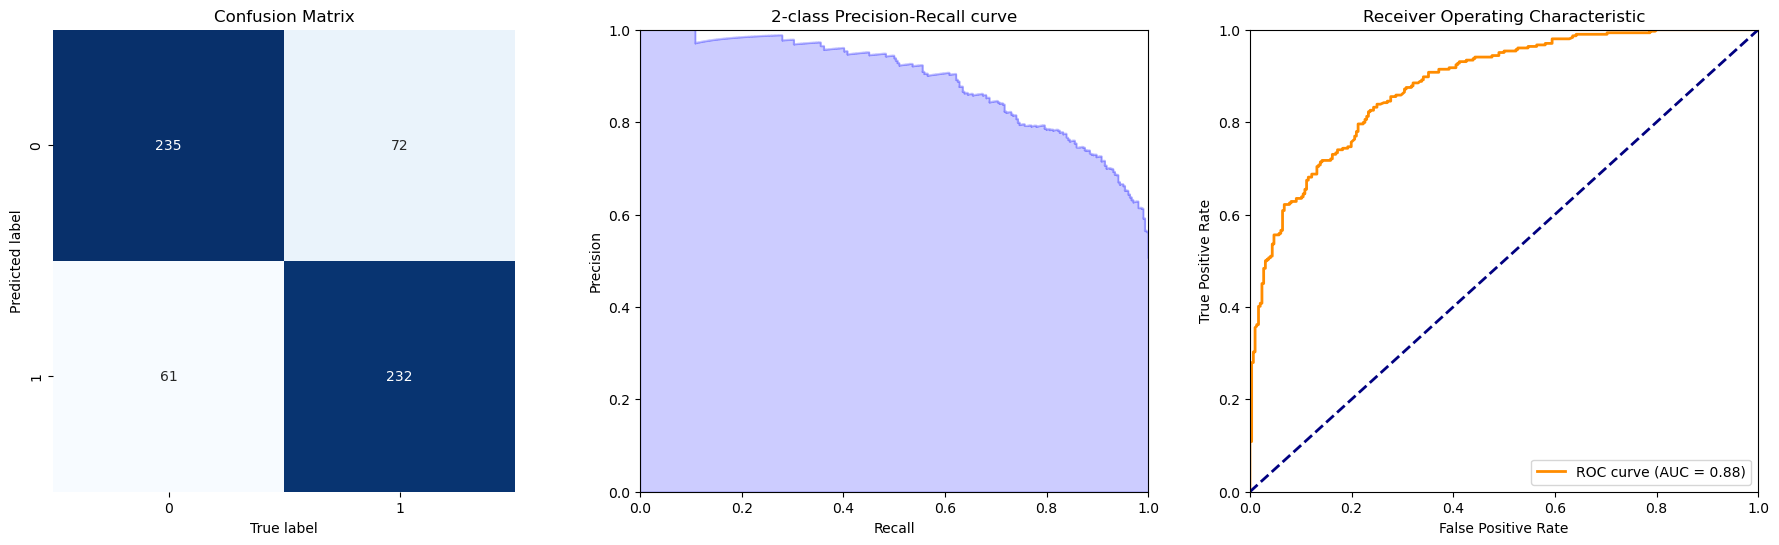

(0.7783333333333333,
 0.7918088737201365,
 0.7631578947368421,
 0.8824624377667142)

In [109]:
# Call the function to display results
show_summary_report(y_test, predictions, probabilities)

## Repeating it all for comparison
Repeat the whole lot in one big block using the show_summary_report function.

Find 'Accuracy', 'Precision', 'Recall', 'ROC_AUC' using CountVectorizer and TfidfVectorizer and keep the result in a dataframe.

In [110]:
# ANSWER
results = pd.DataFrame(columns=['Vectorizer', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

In [113]:

count_vectorizer = CountVectorizer()
A_count = count_vectorizer.fit_transform(X_train)
classifier_count = SVC(kernel='linear', probability=True)
classifier_count.fit(A_count, y_train)


SVC(kernel='linear', probability=True)

In [114]:
B_count = count_vectorizer.transform(X_test)
predictions_count = classifier_count.predict(B_count)
probabilities_count = classifier_count.predict_proba(B_count)[:, 1]

Accuracy : 0.7783 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7938 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7599 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8748                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


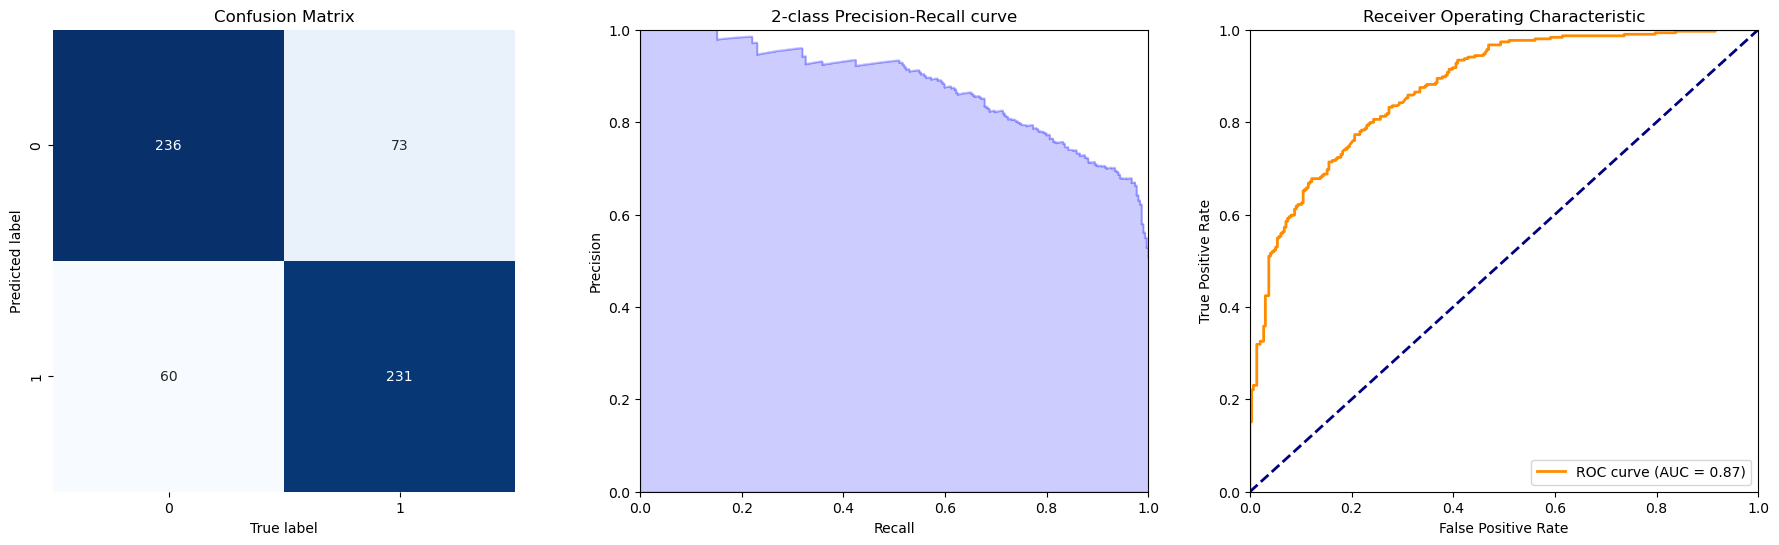

In [119]:

# Get results for CountVectorizer
count_results = show_summary_report(y_test, predictions_count, probabilities_count)
count_row = pd.DataFrame([{'Vectorizer': 'CountVectorizer', 
                           'Accuracy': count_results[0], 
                           'Precision': count_results[1], 
                           'Recall': count_results[2], 
                           'ROC_AUC': count_results[3]}])
results = pd.concat([results, count_row], ignore_index=True)

In [120]:
# 2. Using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
A_tfidf = tfidf_vectorizer.fit_transform(X_train)
classifier_tfidf = SVC(kernel='linear', probability=True)
classifier_tfidf.fit(A_tfidf, y_train)


SVC(kernel='linear', probability=True)

In [121]:
# Test transformation
B_tfidf = tfidf_vectorizer.transform(X_test)
predictions_tfidf = classifier_tfidf.predict(B_tfidf)
probabilities_tfidf = classifier_tfidf.predict_proba(B_tfidf)[:, 1]

Accuracy : 0.7783 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7918 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7632 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8825                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


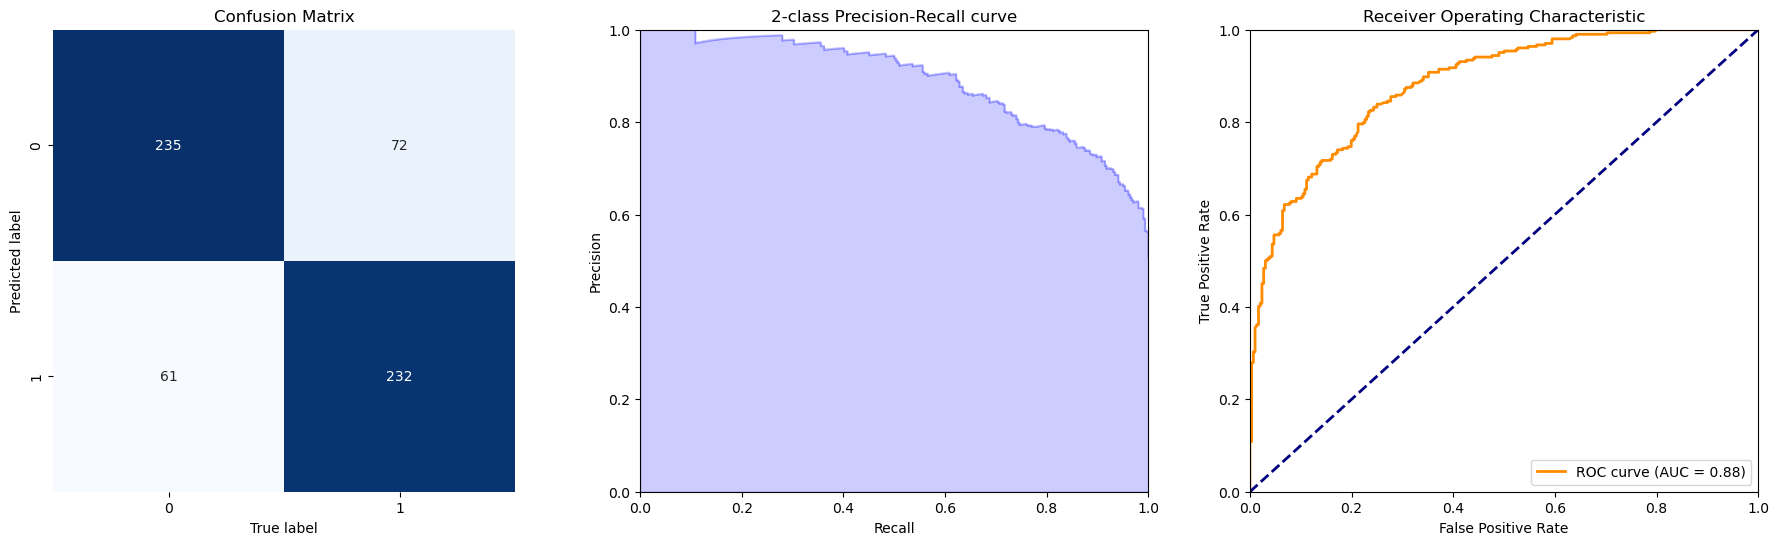

In [122]:
# Get results for TfidfVectorizer
tfidf_results = show_summary_report(y_test, predictions_tfidf, probabilities_tfidf)
tfidf_row = pd.DataFrame([{'Vectorizer': 'TfidfVectorizer', 
                            'Accuracy': tfidf_results[0], 
                            'Precision': tfidf_results[1], 
                            'Recall': tfidf_results[2], 
                            'ROC_AUC': tfidf_results[3]}])
results = pd.concat([results, tfidf_row], ignore_index=True)

In [123]:
# Print the results DataFrame
print(results)

        Vectorizer  Accuracy  Precision    Recall   ROC_AUC
0  CountVectorizer  0.778333   0.793814  0.759868  0.874822
1  TfidfVectorizer  0.778333   0.791809  0.763158  0.882462




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



